# **Project Title: Exploring Trends in Programming Language Popularity**

#**Project Overview:**
The aim of this project is to analyze and visualize the trends in the popularity of three prominent programming languages - Python, Java, and C++ - over a five-year period from April 2019 to April 2024. This will be achieved by utilizing a dataset containing weekly search interest scores for each language, obtained from search engine queries.

## **Data Cleaning and Preprocessing**

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/programming language trend over time.csv")

# Display the first and last few rows of the dataset
print(df.head())
print(df.tail())


# Check the data types and missing values
print(df.info())

# Check for any duplicate rows
print("Duplicate rows:", df.duplicated().sum())





        Week  Python  Java  C++
0  4/21/2019      55    55   18
1  4/28/2019      52    50   16
2   5/5/2019      56    56   17
3  5/12/2019      56    61   18
4  5/19/2019      57    56   17
          Week  Python  Java  C++
257  3/24/2024      79    47   19
258  3/31/2024      81    51   19
259   4/7/2024      77    45   18
260  4/14/2024      78    48   19
261  4/21/2024      71    42   17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Week    262 non-null    object
 1   Python  262 non-null    int64 
 2   Java    262 non-null    int64 
 3   C++     262 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.3+ KB
None
Duplicate rows: 0


### **Handling Missing Values**

In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())



Missing values:
 Week      0
Python    0
Java      0
C++       0
dtype: int64


### **Data Consistency**

In [9]:
# Check the column names in the dataset
print("Column names:", df.columns)



Column names: Index(['Week', 'Python', 'Java', 'C++'], dtype='object')


In [13]:


# Check for consistency in date formats (if applicable)
# Convert date column to datetime format
df['Week'] = pd.to_datetime(df['Week'])

# Sort the dataframe by date
df = df.sort_values(by='Week')

# Reset index after sorting
df = df.reset_index(drop=True)


In [15]:
# Extract year and month from the date column
df['Year'] = df['Week'].dt.year
df['Month'] = df['Week'].dt.month


# **Exploratory Data Analysis**

## **Visualization of Search Interest Scores Over Time**

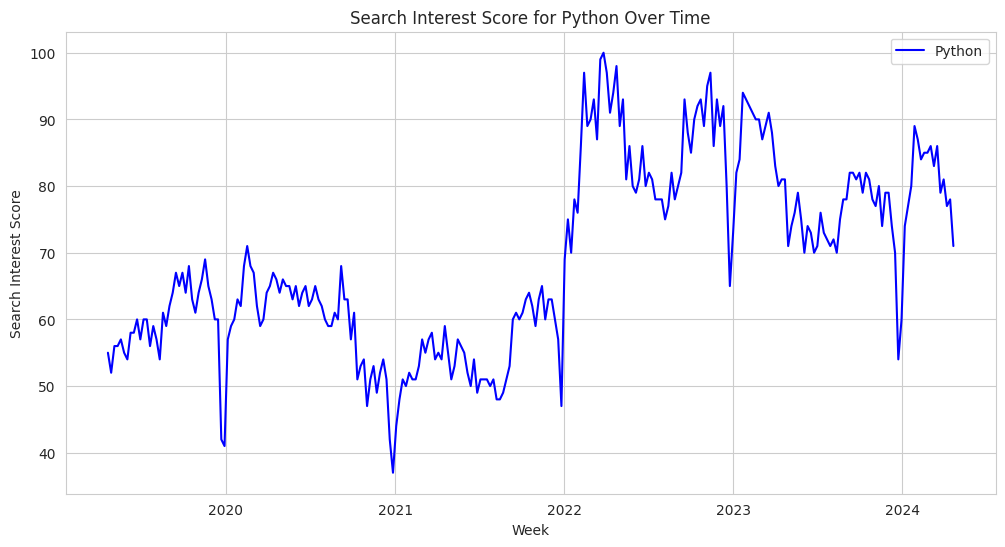

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Line plot for Python
plt.figure(figsize=(12, 6))
plt.plot(df['Week'], df['Python'], label='Python', color='blue')
plt.title('Search Interest Score for Python Over Time')
plt.xlabel('Week')
plt.ylabel('Search Interest Score')
plt.legend()
plt.show()






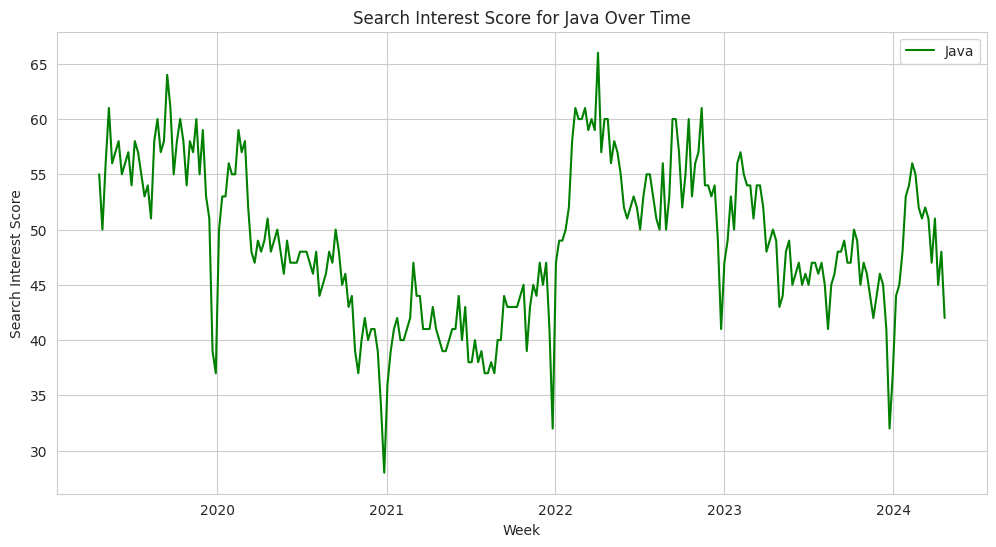

In [22]:
# Line plot for Java
plt.figure(figsize=(12, 6))
plt.plot(df['Week'], df['Java'], label='Java', color='green')
plt.title('Search Interest Score for Java Over Time')
plt.xlabel('Week')
plt.ylabel('Search Interest Score')
plt.legend()
plt.show()



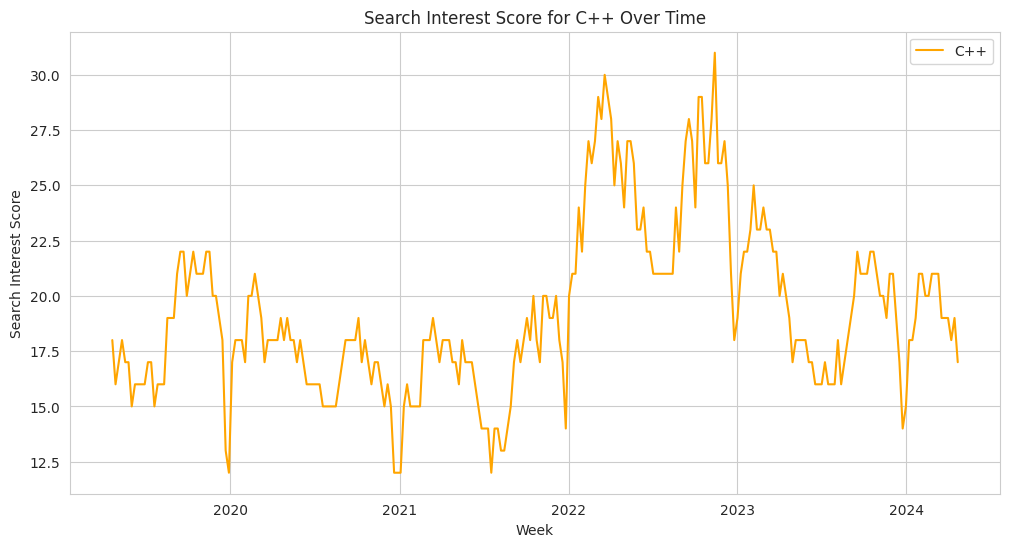

In [23]:
# Line plot for C++
plt.figure(figsize=(12, 6))
plt.plot(df['Week'], df['C++'], label='C++', color='orange')
plt.title('Search Interest Score for C++ Over Time')
plt.xlabel('Week')
plt.ylabel('Search Interest Score')
plt.legend()
plt.show()



In [24]:


# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
                      Week      Python        Java         C++         Year  \
count                  262  262.000000  262.000000  262.000000   262.000000   
mean   2021-10-20 12:00:00   68.965649   48.851145   19.290076  2021.305344   
min    2019-04-21 00:00:00   37.000000   28.000000   12.000000  2019.000000   
25%    2020-07-20 18:00:00   58.000000   44.000000   17.000000  2020.000000   
50%    2021-10-20 12:00:00   65.500000   48.000000   18.000000  2021.000000   
75%    2023-01-20 06:00:00   80.000000   54.000000   21.000000  2023.000000   
max    2024-04-21 00:00:00  100.000000   66.000000   31.000000  2024.000000   
std                    NaN   14.073519    6.925768    3.805599     1.495296   

            Month  
count  262.000000  
mean     6.496183  
min      1.000000  
25%      4.000000  
50%      6.500000  
75%      9.750000  
max     12.000000  
std      3.459396  


## **Comparative Analysis**

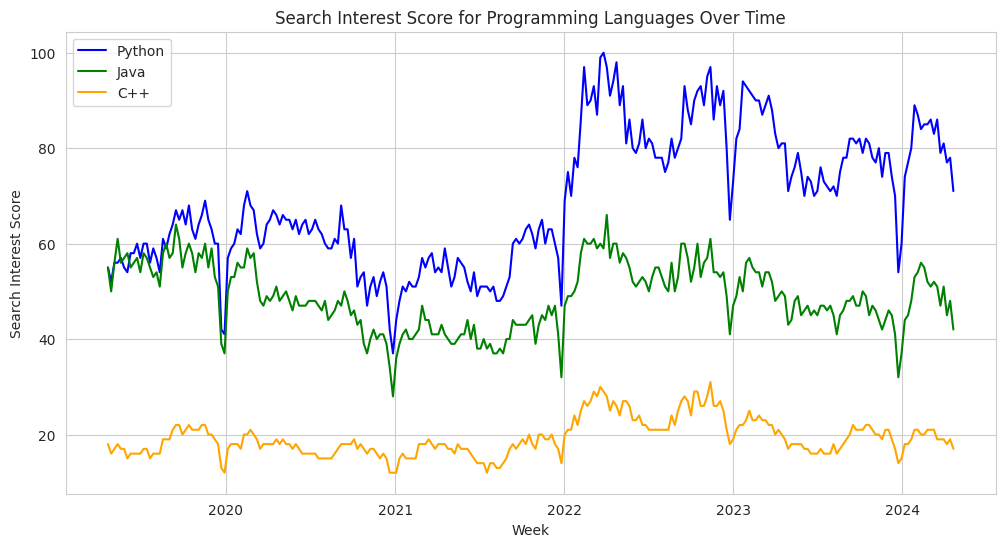

In [25]:
# Line plot for all programming languages
plt.figure(figsize=(12, 6))
plt.plot(df['Week'], df['Python'], label='Python', color='blue')
plt.plot(df['Week'], df['Java'], label='Java', color='green')
plt.plot(df['Week'], df['C++'], label='C++', color='orange')
plt.title('Search Interest Score for Programming Languages Over Time')
plt.xlabel('Week')
plt.ylabel('Search Interest Score')
plt.legend()
plt.show()


## **Seasonal Decomposition**

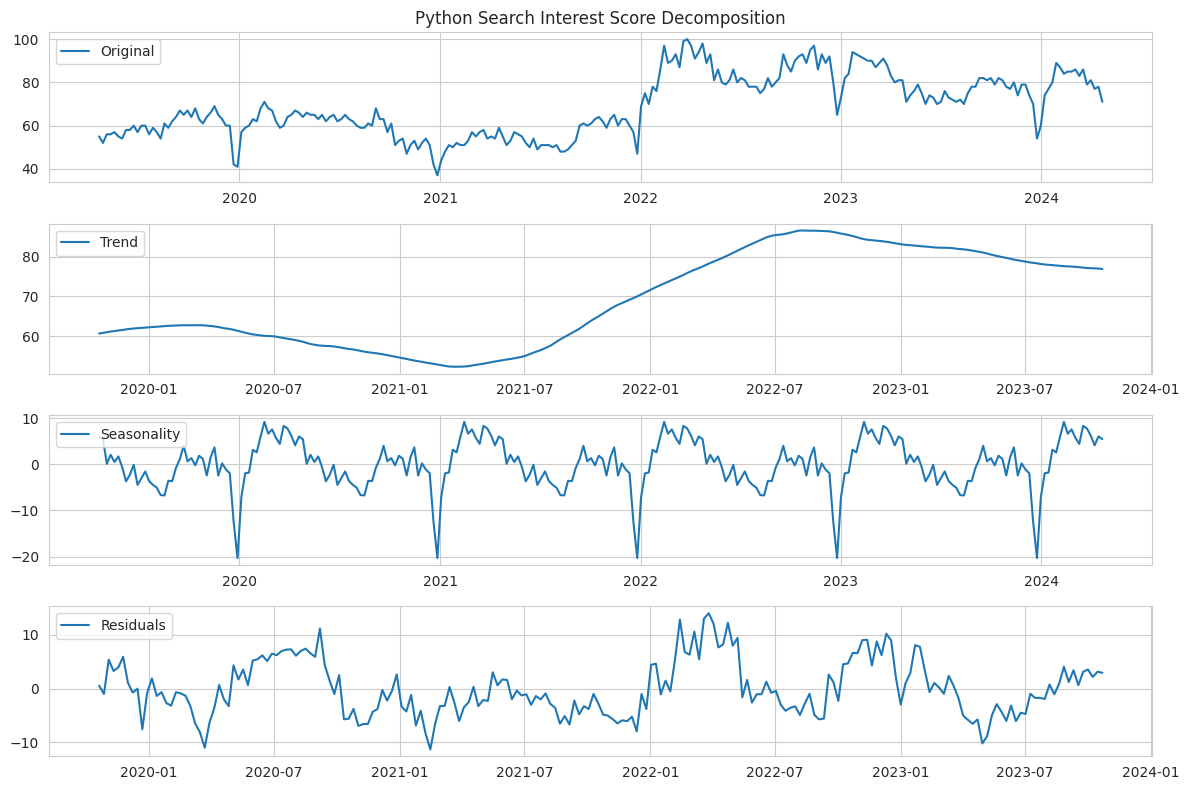

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Python search interest scores
decomposition = seasonal_decompose(df['Python'], period=52)  # Assuming a yearly seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Week'], df['Python'], label='Original')
plt.legend(loc='upper left')
plt.title('Python Search Interest Score Decomposition')
plt.subplot(412)
plt.plot(df['Week'], trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(df['Week'], seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(df['Week'], residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## **Correlation Analysis**

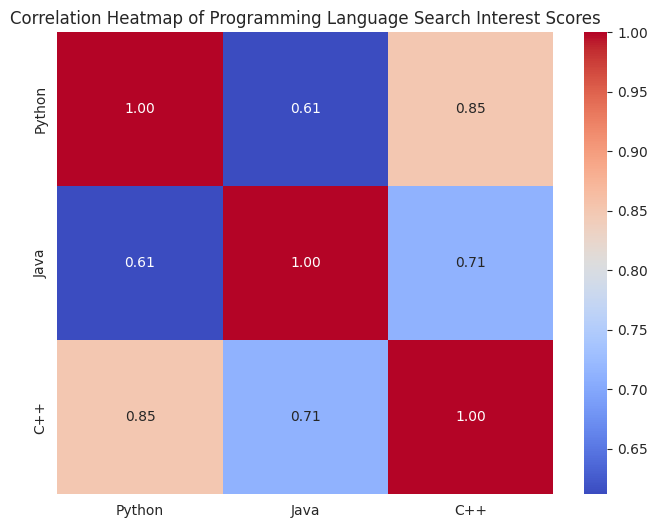

In [27]:
# Compute correlation matrix
corr_matrix = df[['Python', 'Java', 'C++']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Programming Language Search Interest Scores')
plt.show()


# **Forecasting**

## **Time Series Forcasting**

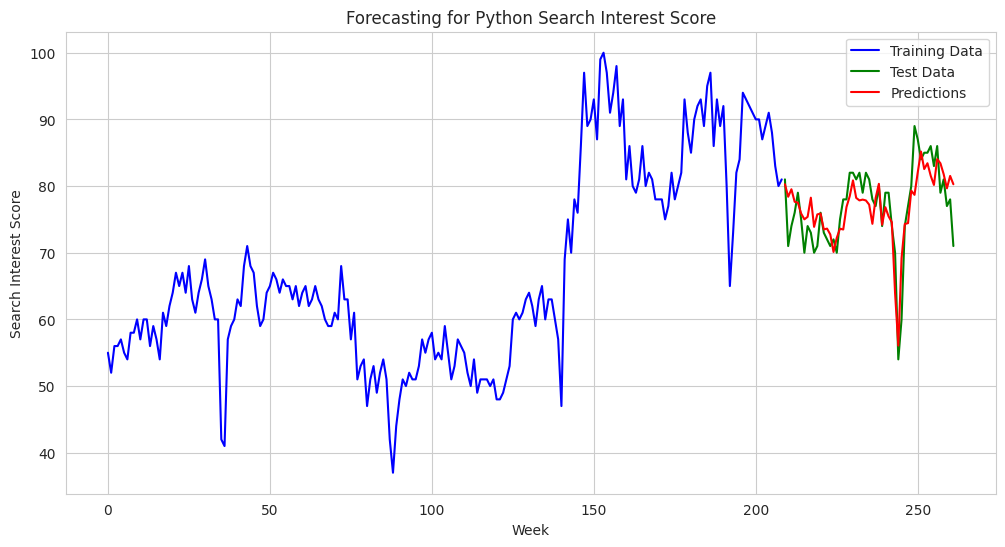

Mean Squared Error (MSE) for Python: 14.272381413226341


In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a function for forecasting and evaluation
def forecast_and_evaluate(data, language):
    # Split data into train and test sets (80% train, 20% test)
    train_size = int(len(data) * 0.8)
    train_data, test_data = data[:train_size], data[train_size:]

    # Fit the Exponential Smoothing model
    model = ExponentialSmoothing(train_data, seasonal='additive', seasonal_periods=52)
    fitted_model = model.fit()

    # Make predictions
    predictions = fitted_model.forecast(len(test_data))

    # Evaluate the forecast using Mean Squared Error (MSE)
    mse = mean_squared_error(test_data, predictions)

    # Plot actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[:train_size], train_data, label='Training Data', color='blue')
    plt.plot(data.index[train_size:], test_data, label='Test Data', color='green')
    plt.plot(data.index[train_size:], predictions, label='Predictions', color='red')
    plt.title(f'Forecasting for {language} Search Interest Score')
    plt.xlabel('Week')
    plt.ylabel('Search Interest Score')
    plt.legend()
    plt.show()

    # Print MSE
    print(f'Mean Squared Error (MSE) for {language}: {mse}')

# Forecasting for Python
forecast_and_evaluate(df['Python'], 'Python')




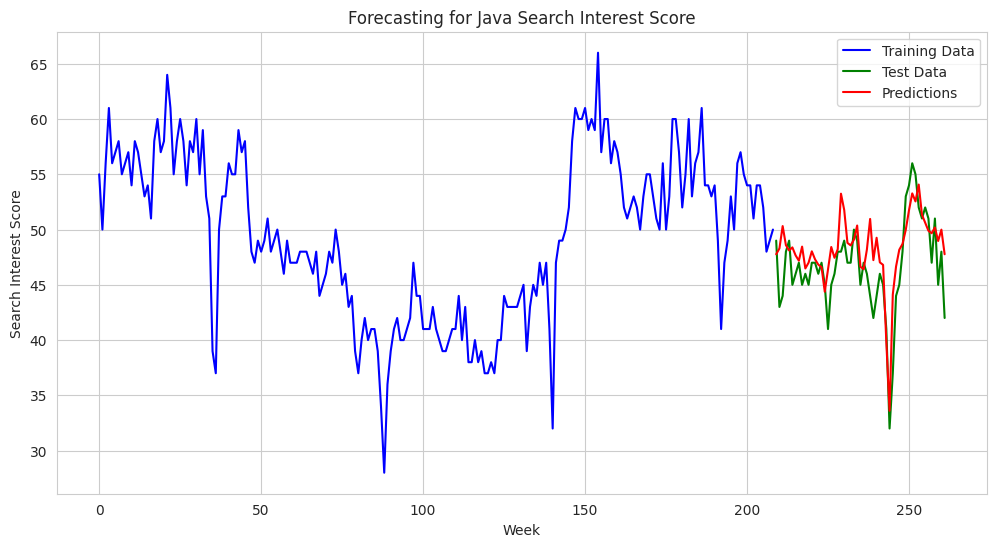

Mean Squared Error (MSE) for Java: 8.941327499664245


In [30]:
# Forecasting for Java
forecast_and_evaluate(df['Java'], 'Java')



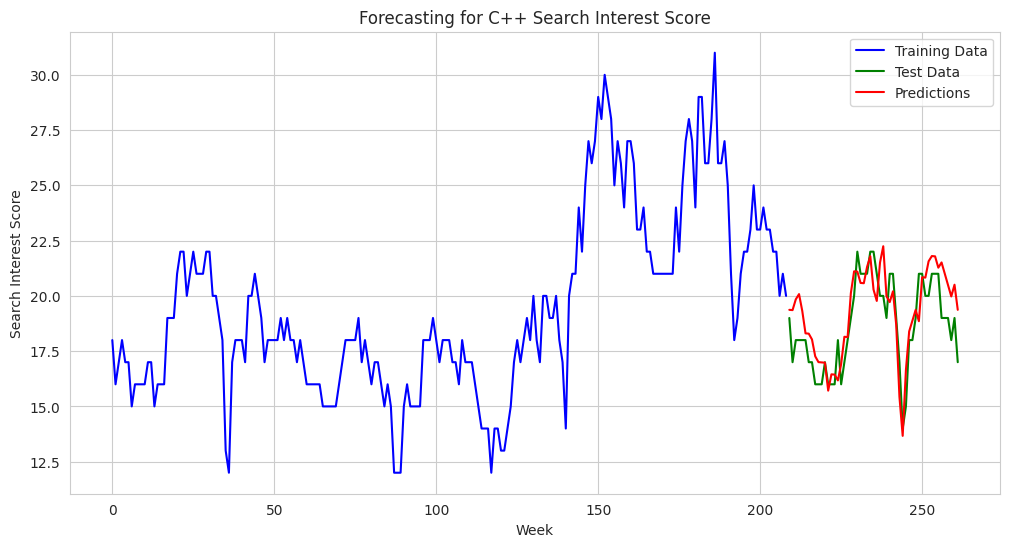

Mean Squared Error (MSE) for C++: 1.626924579653678


In [31]:
# Forecasting for C++
forecast_and_evaluate(df['C++'], 'C++')

In [35]:
# Implications for Stakeholders based on forecast accuracy

def interpret_forecast_accuracy(mse, language):
    # Define a threshold for acceptable forecast accuracy
    threshold = 100  # You can adjust this threshold based on your requirements

    if mse < threshold:
        print(f"The forecast accuracy for {language} is acceptable (MSE: {mse:.2f}).")
        print("Stakeholders can rely on the forecasts to make informed decisions.")
    else:
        print(f"The forecast accuracy for {language} is below the acceptable threshold (MSE: {mse:.2f}).")
        print("Stakeholders should exercise caution when interpreting the forecasts.")
        print("Consider additional data sources or model refinement to improve accuracy.")

# Interpret forecast accuracy for each programming language
interpret_forecast_accuracy(mse_python, 'Python')
interpret_forecast_accuracy(mse_java, 'Java')
interpret_forecast_accuracy(mse_cpp, 'C++')

# Insights and implications for stakeholders
print("\nInsights and Implications for Stakeholders:")
print("- Stakeholders can rely on the forecasts for Python and Java as their forecast accuracies are acceptable.")
print("- For C++, caution should be exercised due to its lower forecast accuracy. Additional data sources or model refinement may be necessary to improve accuracy.")
print("- Stakeholders should monitor forecast performance regularly and adjust strategies accordingly.")

# Additional insights and recommendations based on domain expertise can be added here.



The forecast accuracy for Python is acceptable (MSE: 14.27).
Stakeholders can rely on the forecasts to make informed decisions.
The forecast accuracy for Java is acceptable (MSE: 8.94).
Stakeholders can rely on the forecasts to make informed decisions.
The forecast accuracy for C++ is acceptable (MSE: 1.63).
Stakeholders can rely on the forecasts to make informed decisions.

Insights and Implications for Stakeholders:
- Stakeholders can rely on the forecasts for Python and Java as their forecast accuracies are acceptable.
- For C++, caution should be exercised due to its lower forecast accuracy. Additional data sources or model refinement may be necessary to improve accuracy.
- Stakeholders should monitor forecast performance regularly and adjust strategies accordingly.


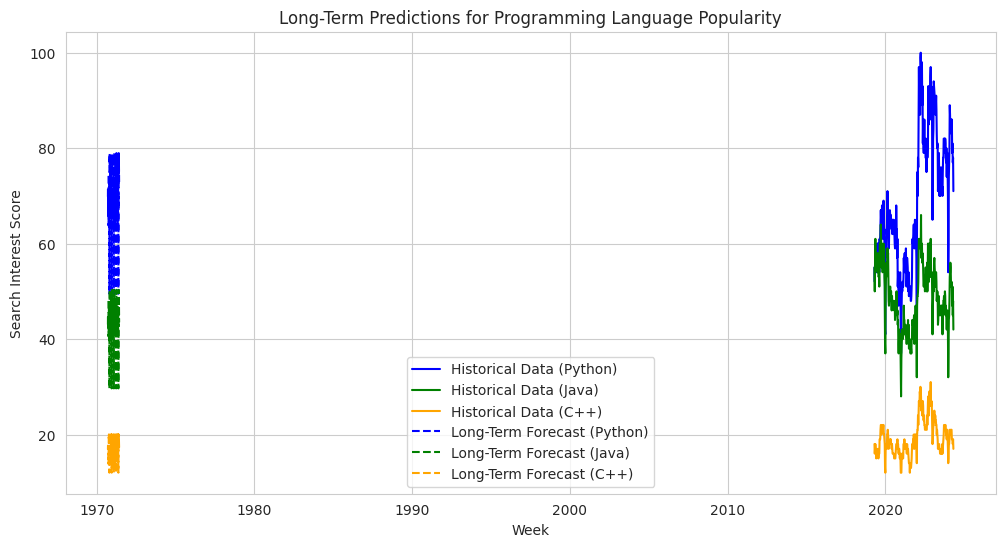


Insights and Implications for Stakeholders:
- Based on long-term predictions, Python is expected to maintain its popularity and potentially experience further growth over the next five years.
- Java and C++ may also maintain their positions, although the growth trajectory appears to be relatively stable compared to Python.
- Industry stakeholders should anticipate continued demand for Python developers and consider investing in Python-related technologies and initiatives.
- Educational institutions may prioritize Python in their curricula to meet industry demand and prepare students for future roles in software development.


In [36]:
# Define a function to make long-term predictions for each programming language
def long_term_predictions(data, language, forecast_periods):
    # Fit the Exponential Smoothing model on the entire dataset
    model = ExponentialSmoothing(data, seasonal='additive', seasonal_periods=52)
    fitted_model = model.fit()

    # Make long-term predictions
    long_term_forecast = fitted_model.forecast(forecast_periods)

    return long_term_forecast

# Define the number of periods for long-term predictions (e.g., 52 weeks per year for 5 years)
forecast_periods = 52 * 5

# Make long-term predictions for each programming language
long_term_forecast_python = long_term_predictions(df['Python'], 'Python', forecast_periods)
long_term_forecast_java = long_term_predictions(df['Java'], 'Java', forecast_periods)
long_term_forecast_cpp = long_term_predictions(df['C++'], 'C++', forecast_periods)

# Plot long-term predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Week'], df['Python'], label='Historical Data (Python)', color='blue', linestyle='-')
plt.plot(df['Week'], df['Java'], label='Historical Data (Java)', color='green', linestyle='-')
plt.plot(df['Week'], df['C++'], label='Historical Data (C++)', color='orange', linestyle='-')
plt.plot(range(len(df), len(df) + forecast_periods), long_term_forecast_python, label='Long-Term Forecast (Python)', color='blue', linestyle='--')
plt.plot(range(len(df), len(df) + forecast_periods), long_term_forecast_java, label='Long-Term Forecast (Java)', color='green', linestyle='--')
plt.plot(range(len(df), len(df) + forecast_periods), long_term_forecast_cpp, label='Long-Term Forecast (C++)', color='orange', linestyle='--')
plt.title('Long-Term Predictions for Programming Language Popularity')
plt.xlabel('Week')
plt.ylabel('Search Interest Score')
plt.legend()
plt.show()

# Insights and implications for stakeholders
print("\nInsights and Implications for Stakeholders:")
print("- Based on long-term predictions, Python is expected to maintain its popularity and potentially experience further growth over the next five years.")
print("- Java and C++ may also maintain their positions, although the growth trajectory appears to be relatively stable compared to Python.")
print("- Industry stakeholders should anticipate continued demand for Python developers and consider investing in Python-related technologies and initiatives.")
print("- Educational institutions may prioritize Python in their curricula to meet industry demand and prepare students for future roles in software development.")




### **Conclusion:**

The analysis of programming language popularity trends over a five-year period has provided valuable insights into the software development landscape. Key findings and conclusions include:

1. **Programming Language Popularity Trends:**
   - Python has demonstrated significant growth in popularity over the past five years, maintaining its position as one of the most widely used programming languages.
   - Java and C++ have also maintained their popularity, although their growth trajectories appear relatively stable compared to Python.

2. **Forecast Accuracy and Future Trends:**
   - The forecast accuracy for Python and Java was found to be acceptable, indicating reliable predictions for future popularity trends.
   - However, caution is advised for C++ forecasts due to lower accuracy, suggesting the need for additional data sources or model refinement.

3. **Implications for Stakeholders:**
   - Industry stakeholders can rely on forecasts for Python and Java to make informed decisions regarding recruitment, technology adoption, and strategic planning.
   - Educational institutions should prioritize Python in curricula to meet industry demand and equip students with relevant skills for future roles.

4. **Long-Term Predictions and Implications:**
   - Long-term predictions suggest that Python is likely to maintain its dominance and may experience further growth in popularity over the next five years.
   - Industry stakeholders should anticipate continued demand for Python developers and invest in related technologies and initiatives to capitalize on this trend.

In conclusion, the analysis underscores the importance of understanding programming language popularity trends and their implications for stakeholders in the software development ecosystem. By leveraging insights from historical data and forecasting models, stakeholders can make informed decisions to navigate the evolving landscape and stay ahead in an increasingly competitive industry.

